# **🛠️A.  Preparación de los Datos**

##1.	Extracción del Archivo Tratado


In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/datos_limpios_telecom1.csv')
df.head()

,ID_Cliente,BajaDelCliente,cliente.Genero,cliente.AdultoMayor,cliente.Pareja,cliente.Dependientes,cliente.Antiguedad,telefono.ServicioTelefonico,telefono.MultiplesLineas,internet.ServicioDeInternet,...,internet.SoporteTecnico,internet.TVenLinea,internet.PeliculasEnLinea,cuenta.TipoContrato,cuenta.FacturaElectronica,cuenta.MetodoDePago,cuenta.CargosMensuales,cuenta.CargosTotales,cuenta.CargosDiarios,EstadoCliente
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,yes,yes,no,one year,Yes,mailed check,65.6,593.30,2.19,Activo
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,no,no,yes,month-to-month,No,mailed check,59.9,542.40,2.00,Activo
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,no,no,no,month-to-month,Yes,electronic check,73.9,280.85,2.46,Se dio de baja
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,no,yes,yes,month-to-month,Yes,electronic check,98.0,1237.85,3.27,Se dio de baja
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,yes,yes,no,month-to-month,Yes,mailed check,83.9,267.40,2.80,Se dio de baja


In [363]:
df.columns

Index(['ID_Cliente', 'BajaDelCliente', 'cliente.Genero', 'cliente.AdultoMayor',
       'cliente.Pareja', 'cliente.Dependientes', 'cliente.Antiguedad',
       'telefono.ServicioTelefonico', 'telefono.MultiplesLineas',
       'internet.ServicioDeInternet', 'internet.SeguridadOnline',
       'internet.BackupOnline', 'internet.SeguridadDispositivo',
       'internet.SoporteTecnico', 'internet.TVenLinea',
       'internet.PeliculasEnLinea', 'cuenta.TipoContrato',
       'cuenta.FacturaElectronica', 'cuenta.MetodoDePago',
       'cuenta.CargosMensuales', 'cuenta.CargosTotales',
       'cuenta.CargosDiarios', 'EstadoCliente'],
      dtype='object')

In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID_Cliente                     7032 non-null   object 
 1   BajaDelCliente                 7032 non-null   int64  
 2   cliente.Genero                 7032 non-null   object 
 3   cliente.AdultoMayor            7032 non-null   int64  
 4   cliente.Pareja                 7032 non-null   int64  
 5   cliente.Dependientes           7032 non-null   int64  
 6   cliente.Antiguedad             7032 non-null   int64  
 7   telefono.ServicioTelefonico    7032 non-null   int64  
 8   telefono.MultiplesLineas       7032 non-null   object 
 9   internet.ServicioDeInternet    7032 non-null   object 
 10  internet.SeguridadOnline       7032 non-null   object 
 11  internet.BackupOnline          7032 non-null   object 
 12  internet.SeguridadDispositivo  7032 non-null   o

##2.	Eliminación de Columnas Irrelevantes

In [365]:
#eliminamos columna id
df = df.drop(columns=['ID_Cliente'])

In [366]:
#eliminamos columna 'estado cliente', que solo fue creada para los graficos
df = df.drop(columns=['EstadoCliente'])

##3.	Encoding

In [367]:
col_categoricas = df.select_dtypes(include='object').columns
col_categoricas

Index(['cliente.Genero', 'telefono.MultiplesLineas',
       'internet.ServicioDeInternet', 'internet.SeguridadOnline',
       'internet.BackupOnline', 'internet.SeguridadDispositivo',
       'internet.SoporteTecnico', 'internet.TVenLinea',
       'internet.PeliculasEnLinea', 'cuenta.TipoContrato',
       'cuenta.FacturaElectronica', 'cuenta.MetodoDePago'],
      dtype='object')

In [368]:
df[col_categoricas].apply(lambda x: x.unique())

,0
cliente.Genero,"[female, male]"
telefono.MultiplesLineas,"[no, yes, no phone service]"
internet.ServicioDeInternet,"[dsl, fiber optic, no]"
internet.SeguridadOnline,"[no, yes, no internet service]"
internet.BackupOnline,"[yes, no, no internet service]"
internet.SeguridadDispositivo,"[no, yes, no internet service]"
internet.SoporteTecnico,"[yes, no, no internet service]"
internet.TVenLinea,"[yes, no, no internet service]"
internet.PeliculasEnLinea,"[no, yes, no internet service]"
cuenta.TipoContrato,"[one year, month-to-month, two year]"


In [369]:
import warnings
warnings.filterwarnings('ignore')

#las columnas 'cliente.Genero' y 'cuenta.FacturaElectronica' asumen solo 2 valores posibles, por lo que las convierto en variables numericas binarias para facilitar el modelado
df['cliente.Genero'] = df['cliente.Genero'].replace({'female': 0, 'male': 1})
df['cuenta.FacturaElectronica'] = df['cuenta.FacturaElectronica'].replace({'No': 0, 'Yes': 1})

In [370]:
#renombro la columna cliente.Genero para que se interprete mejor sus valores
df = df.rename(columns={'cliente.Genero': 'cliente.Masculino'})

In [371]:
#cambio el tipo de datos de ambas columnas
import numpy as np
df['cliente.Masculino'] = df['cliente.Masculino'].astype(np.int64)
df['cuenta.FacturaElectronica'] = df['cuenta.FacturaElectronica'].astype(np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BajaDelCliente                 7032 non-null   int64  
 1   cliente.Masculino              7032 non-null   int64  
 2   cliente.AdultoMayor            7032 non-null   int64  
 3   cliente.Pareja                 7032 non-null   int64  
 4   cliente.Dependientes           7032 non-null   int64  
 5   cliente.Antiguedad             7032 non-null   int64  
 6   telefono.ServicioTelefonico    7032 non-null   int64  
 7   telefono.MultiplesLineas       7032 non-null   object 
 8   internet.ServicioDeInternet    7032 non-null   object 
 9   internet.SeguridadOnline       7032 non-null   object 
 10  internet.BackupOnline          7032 non-null   object 
 11  internet.SeguridadDispositivo  7032 non-null   object 
 12  internet.SoporteTecnico        7032 non-null   o

In [372]:
col_categoricas = df.select_dtypes(include='object').columns
col_categoricas

Index(['telefono.MultiplesLineas', 'internet.ServicioDeInternet',
       'internet.SeguridadOnline', 'internet.BackupOnline',
       'internet.SeguridadDispositivo', 'internet.SoporteTecnico',
       'internet.TVenLinea', 'internet.PeliculasEnLinea',
       'cuenta.TipoContrato', 'cuenta.MetodoDePago'],
      dtype='object')

In [373]:
# De estas col categoricas agrupo las opciones 'no' y 'no internet service' (o 'no phone service') para reducir la multicolinealidad y simplificar los datos sin perder relevancia en el modelo predictivo.
df_clean = df.copy()

cols_to_fix = ['internet.SeguridadOnline', 'internet.BackupOnline',
       'internet.SeguridadDispositivo', 'internet.SoporteTecnico',
       'internet.TVenLinea', 'internet.PeliculasEnLinea']

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('no internet service', 'no')

df_clean['telefono.MultiplesLineas'] = df_clean['telefono.MultiplesLineas'].replace('no phone service', 'no')

In [374]:
# Al convertirse en columnas con 2 opciones las tranformo en numericas binarias
for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace({'no': 0, 'yes': 1})
    df_clean[col] = df_clean[col].astype(np.int64)

df_clean['telefono.MultiplesLineas'] = df_clean['telefono.MultiplesLineas'].replace({'no': 0, 'yes': 1})
df_clean['telefono.MultiplesLineas'] = df_clean['telefono.MultiplesLineas'].astype(np.int64)

df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BajaDelCliente                 7032 non-null   int64  
 1   cliente.Masculino              7032 non-null   int64  
 2   cliente.AdultoMayor            7032 non-null   int64  
 3   cliente.Pareja                 7032 non-null   int64  
 4   cliente.Dependientes           7032 non-null   int64  
 5   cliente.Antiguedad             7032 non-null   int64  
 6   telefono.ServicioTelefonico    7032 non-null   int64  
 7   telefono.MultiplesLineas       7032 non-null   int64  
 8   internet.ServicioDeInternet    7032 non-null   object 
 9   internet.SeguridadOnline       7032 non-null   int64  
 10  internet.BackupOnline          7032 non-null   int64  
 11  internet.SeguridadDispositivo  7032 non-null   int64  
 12  internet.SoporteTecnico        7032 non-null   i

In [375]:
#codifico las var categoricas restantes
col_categ_clean = df_clean.select_dtypes(include='object').columns

df_encoded = pd.get_dummies(df_clean, columns=col_categ_clean, dtype=int)
df_encoded.head()

,BajaDelCliente,cliente.Masculino,cliente.AdultoMayor,cliente.Pareja,cliente.Dependientes,cliente.Antiguedad,telefono.ServicioTelefonico,telefono.MultiplesLineas,internet.SeguridadOnline,internet.BackupOnline,...,internet.ServicioDeInternet_dsl,internet.ServicioDeInternet_fiber optic,internet.ServicioDeInternet_no,cuenta.TipoContrato_month-to-month,cuenta.TipoContrato_one year,cuenta.TipoContrato_two year,cuenta.MetodoDePago_bank transfer automatic,cuenta.MetodoDePago_credit card automatic,cuenta.MetodoDePago_electronic check,cuenta.MetodoDePago_mailed check
0,0,0,0,1,1,9,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,9,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,1,0,0,0,4,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,1,1,1,1,0,13,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,1,1,0,3,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [376]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   BajaDelCliente                                7032 non-null   int64  
 1   cliente.Masculino                             7032 non-null   int64  
 2   cliente.AdultoMayor                           7032 non-null   int64  
 3   cliente.Pareja                                7032 non-null   int64  
 4   cliente.Dependientes                          7032 non-null   int64  
 5   cliente.Antiguedad                            7032 non-null   int64  
 6   telefono.ServicioTelefonico                   7032 non-null   int64  
 7   telefono.MultiplesLineas                      7032 non-null   int64  
 8   internet.SeguridadOnline                      7032 non-null   int64  
 9   internet.BackupOnline                         7032 non-null   i

##4.	Verificación de la Proporción de Cancelación (Churn)

In [377]:
df_encoded['BajaDelCliente'].value_counts(normalize=True)


,proportion
BajaDelCliente,
0,0.734215
1,0.265785


    Existe un desbalance importante entre clases



##5.	Balanceo de Clases (opcional)
Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como SMOTE pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

    Este paso lo realizo mas adelante

##6.	Normalización o Estandarización (si es necesario)

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.


    Este paso lo realizo mas adelante

#🎯 B. Correlación y Selección de Variables

##1.	Análisis de Correlación

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor correlación con la cancelación, ya que estas pueden ser fuertes candidatas para el modelo predictivo.


In [378]:
df_corr = df_encoded.corr()

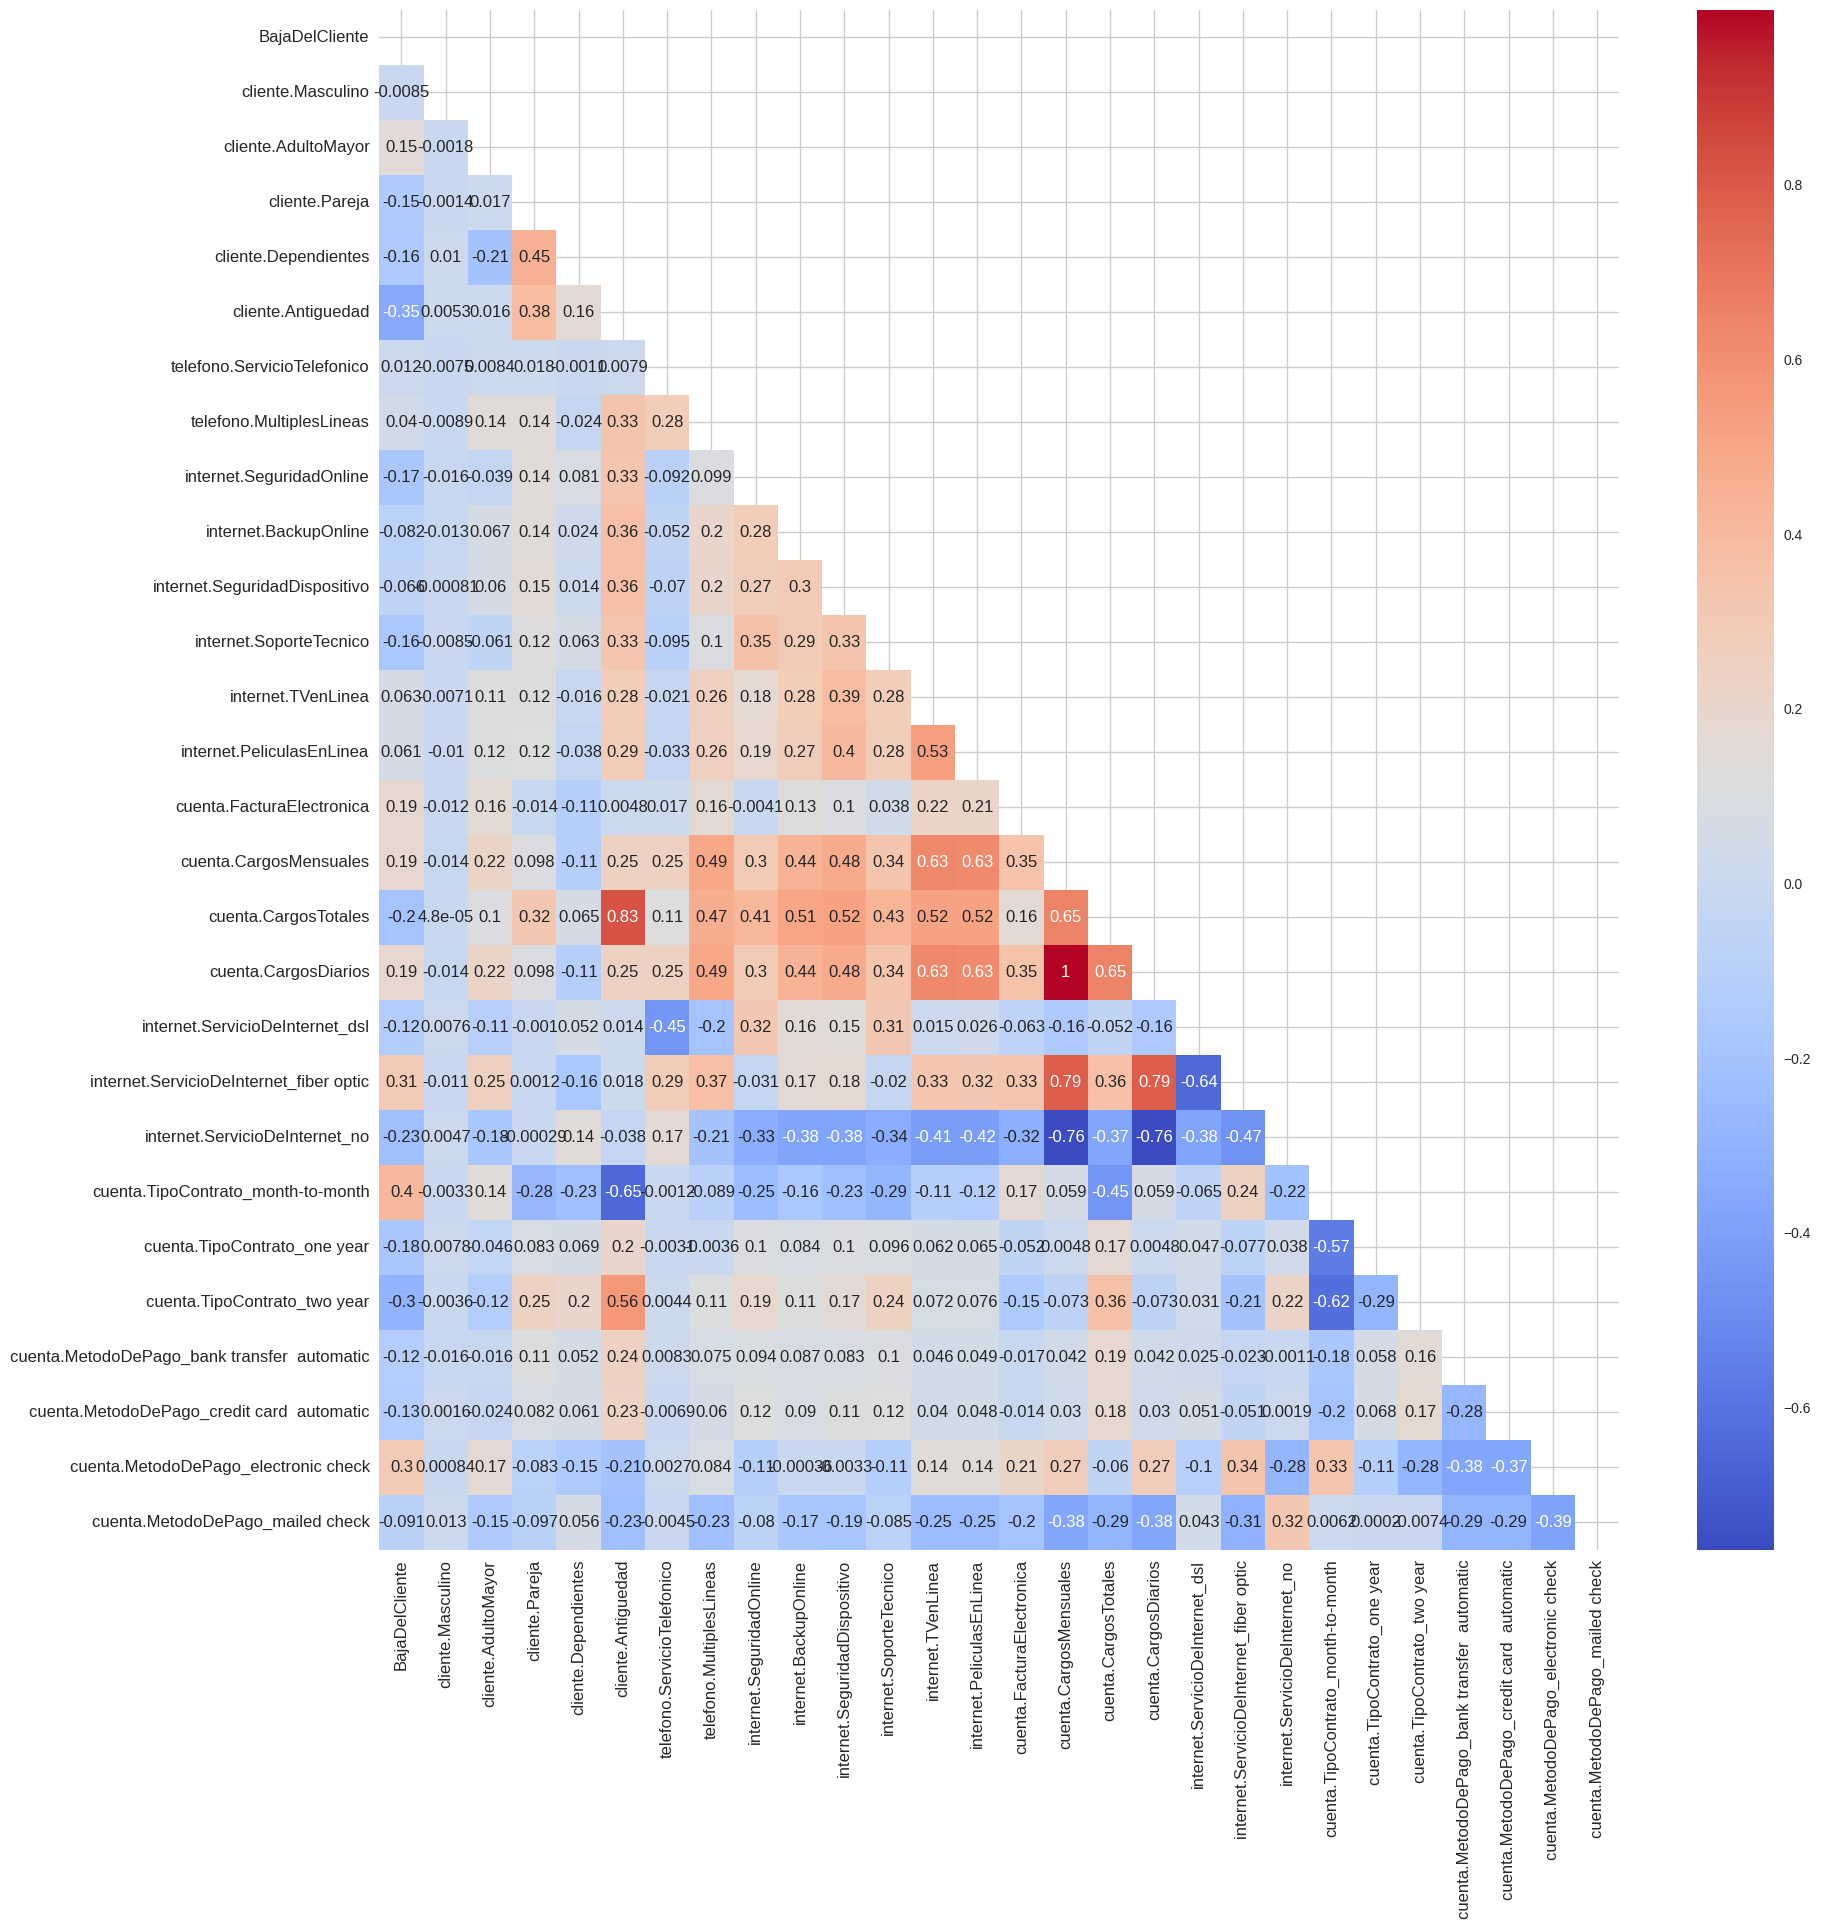

In [379]:
# Matriz de correlacion con una mascara en la parte superior
mask = np.triu(np.ones_like(df_corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr, mask=mask, annot=True, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


    De este grafico llama la atención la correlacion perfecta positiva entre las variables
      'cuenta.CargosMensuales' y 'cuenta.CargosDiarios'.
      


    Ademas,  cuando las variables predictoras en un modelo de clasificación están altamente
    correlacionadas entre sí, esto puede dificultar la interpretación de los coeficientes del modelo y la
    evaluación de la importancia de cada variable. Esto puede reducir la generalización a datos
    nuevos y hacer que el modelo sea menos robusto. Es lo que se conoce como Multicolinearidad

In [380]:
# Correlaciones mayores a 80% en valores absolutos:

df_corr_abs = df_corr.abs()

dic = dict(df_corr_abs[df_corr_abs > 0.80].stack())


In [381]:
# De este dic selecciono solo los que tienen valor  distinto de 1.0
dic_filtrado = {k: v for k, v in dic.items() if v != 1.0}
dic_filtrado

{('cliente.Antiguedad',
  'cuenta.CargosTotales'): np.float64(0.8258804609332004),
 ('cuenta.CargosMensuales',
  'cuenta.CargosDiarios'): np.float64(0.9999956480333344),
 ('cuenta.CargosTotales',
  'cliente.Antiguedad'): np.float64(0.8258804609332004),
 ('cuenta.CargosDiarios',
  'cuenta.CargosMensuales'): np.float64(0.9999956480333344)}

    De aqui se desprende la existencia de una muy alta correlacion entre las variables Antiguedad y
    CargosTotales,  y una correlacion perfecta positiva entre las variables CargosDiarios y CargosMensuales.
    Volvere a este tema mas adelante.

## Correlacion respecto a la variable objetivo

In [382]:
# Correlacion respecto a  la variable 'BajaDelCliente'
df_corr['BajaDelCliente'].sort_values(ascending=False)

,BajaDelCliente
BajaDelCliente,1.000000
cuenta.TipoContrato_month-to-month,0.404565
internet.ServicioDeInternet_fiber optic,0.307463
cuenta.MetodoDePago_electronic check,0.301455
cuenta.CargosDiarios,0.192914
cuenta.CargosMensuales,0.192858
cuenta.FacturaElectronica,0.191454
cliente.AdultoMayor,0.150541
internet.TVenLinea,0.063254
internet.PeliculasEnLinea,0.060860


In [383]:
#variables con correlacion menor al 15% en valores absolutos respecto a BajaDelCliente
df_corr_baja = df_corr['BajaDelCliente'].abs().sort_values(ascending=False)
df_corr_baja[df_corr_baja < 0.15]

,BajaDelCliente
cliente.Pareja,0.149982
cuenta.MetodoDePago_credit card automatic,0.134687
internet.ServicioDeInternet_dsl,0.124141
cuenta.MetodoDePago_bank transfer automatic,0.118136
cuenta.MetodoDePago_mailed check,0.090773
internet.BackupOnline,0.082307
internet.SeguridadDispositivo,0.066193
internet.TVenLinea,0.063254
internet.PeliculasEnLinea,0.060860
telefono.MultiplesLineas,0.040033


    Estas variables serán eliminadas del analisis debido a su escasa correlacion con la variable objetivo

In [384]:
vars_baja_corr = df_corr_baja[df_corr_baja < 0.15].index.to_list()
vars_baja_corr

['cliente.Pareja',
 'cuenta.MetodoDePago_credit card  automatic',
 'internet.ServicioDeInternet_dsl',
 'cuenta.MetodoDePago_bank transfer  automatic',
 'cuenta.MetodoDePago_mailed check',
 'internet.BackupOnline',
 'internet.SeguridadDispositivo',
 'internet.TVenLinea',
 'internet.PeliculasEnLinea',
 'telefono.MultiplesLineas',
 'telefono.ServicioTelefonico',
 'cliente.Masculino']

In [385]:
df_encoded = df_encoded.drop(columns=vars_baja_corr)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   BajaDelCliente                           7032 non-null   int64  
 1   cliente.AdultoMayor                      7032 non-null   int64  
 2   cliente.Dependientes                     7032 non-null   int64  
 3   cliente.Antiguedad                       7032 non-null   int64  
 4   internet.SeguridadOnline                 7032 non-null   int64  
 5   internet.SoporteTecnico                  7032 non-null   int64  
 6   cuenta.FacturaElectronica                7032 non-null   int64  
 7   cuenta.CargosMensuales                   7032 non-null   float64
 8   cuenta.CargosTotales                     7032 non-null   float64
 9   cuenta.CargosDiarios                     7032 non-null   float64
 10  internet.ServicioDeInternet_fiber optic  7032 no

##2.	Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

•	Tiempo de contrato × Cancelación

•	Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.


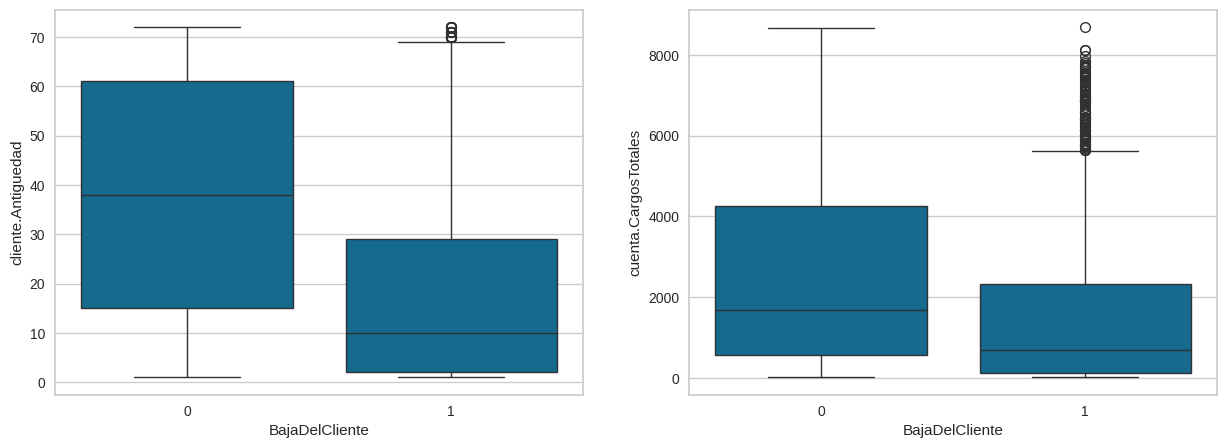

In [386]:
#Boxplots de Antiguedad y Cargos totales en relacion con la Baja de Clientes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cliente.Antiguedad', ax=ax[0])
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cuenta.CargosTotales', ax=ax[1])
plt.show()


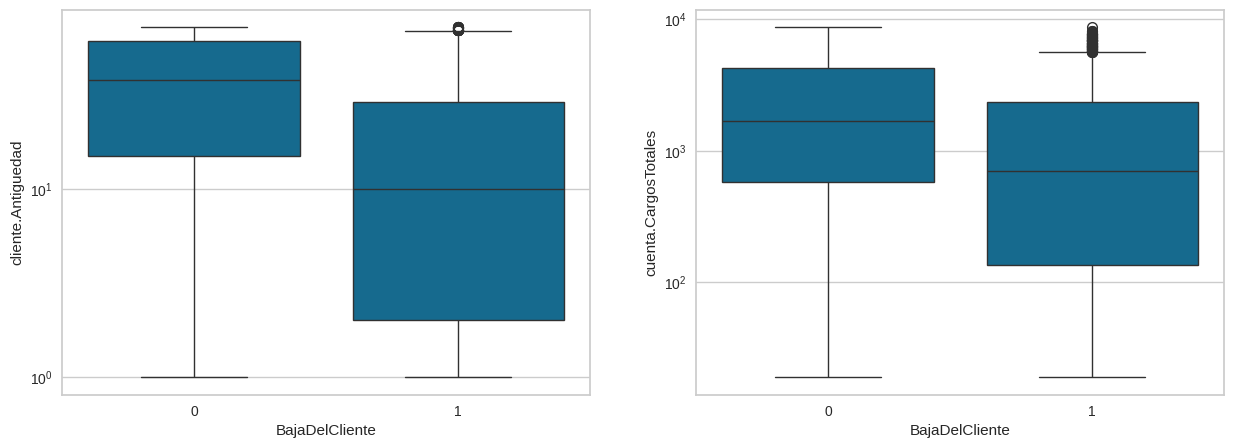

In [387]:
#Boxplots en escala logaritmica de Antiguedad y Cargos totales en relacion con la Baja de Clientes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cliente.Antiguedad', ax=ax[0])
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cuenta.CargosTotales', ax=ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.show()

    Atraves de estas figuras se observa como ambas variables (Antiguedad y Cargos Totales) en general
    tienen un comportamiento muy similar en relacion a la Baja de Clientes, lo cual tambien reafirma ese
    alto coeficiente positivo de 0,83 de correlacion entre ambas variables.
    Esto es logico si asumimos que el monto de Cargo total se obtiene aproximadamente sumando todos los cargos mensuales cobrados
    desde el inicio de la relacion comercial, es decir la antiguedad del cliente. Ambas variables estan
    muy relacionadas entre si. El monto de Cargos totales depende fuertemente de la antiguedad del cliente.
    Es por esta razon que decido eliminar la variable
    CargosTotales del analisis predictivo.

In [388]:
df_encoded = df_encoded.drop(columns='cuenta.CargosTotales')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   BajaDelCliente                           7032 non-null   int64  
 1   cliente.AdultoMayor                      7032 non-null   int64  
 2   cliente.Dependientes                     7032 non-null   int64  
 3   cliente.Antiguedad                       7032 non-null   int64  
 4   internet.SeguridadOnline                 7032 non-null   int64  
 5   internet.SoporteTecnico                  7032 non-null   int64  
 6   cuenta.FacturaElectronica                7032 non-null   int64  
 7   cuenta.CargosMensuales                   7032 non-null   float64
 8   cuenta.CargosDiarios                     7032 non-null   float64
 9   internet.ServicioDeInternet_fiber optic  7032 non-null   int64  
 10  internet.ServicioDeInternet_no           7032 no

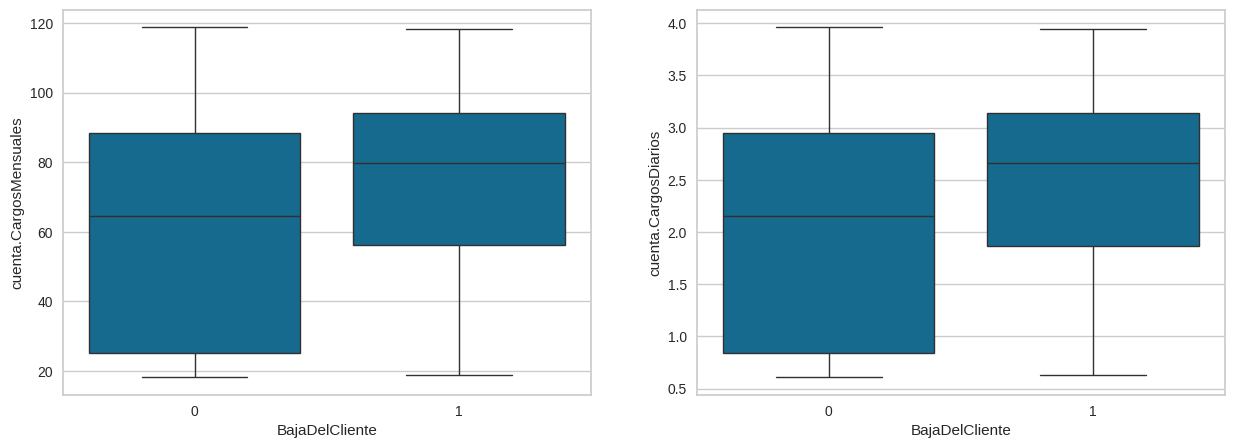

In [389]:
#Boxplots de Cargos Mensuales y Cargos Diarios en relacion con la Baja de Clientes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cuenta.CargosMensuales', ax=ax[0])
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cuenta.CargosDiarios', ax=ax[1])
plt.show()


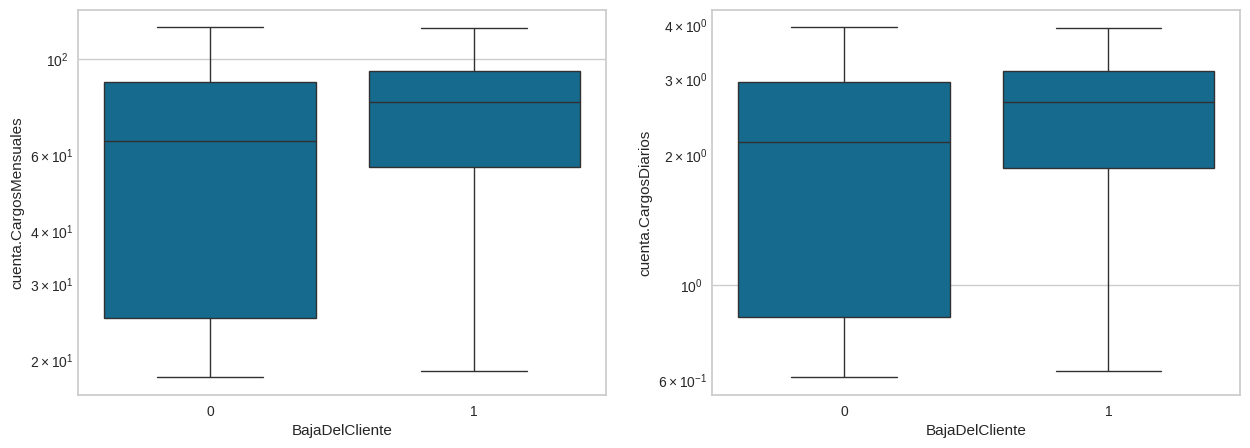

In [390]:
#Boxplots  en escala logaritmica de Cargos Mensuales y Cargos Diarios en relacion con la Baja de Clientes
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cuenta.CargosMensuales', ax=ax[0])
sns.boxplot(data=df_encoded, x='BajaDelCliente', y='cuenta.CargosDiarios', ax=ax[1])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
plt.show()



    Aqui se ve claramente como la distribucion de ambas variables respecto a la baja de clientes es
    identica, lo que sumado a la correlacion perfecta positiva entre ambas variables, deriva en la
    necesidad de eliminar una de ellas del analisis, ya que de lo contrario afectaria los
    resultados del modelo predictivo

In [391]:
df_encoded = df_encoded.drop(columns='cuenta.CargosDiarios')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   BajaDelCliente                           7032 non-null   int64  
 1   cliente.AdultoMayor                      7032 non-null   int64  
 2   cliente.Dependientes                     7032 non-null   int64  
 3   cliente.Antiguedad                       7032 non-null   int64  
 4   internet.SeguridadOnline                 7032 non-null   int64  
 5   internet.SoporteTecnico                  7032 non-null   int64  
 6   cuenta.FacturaElectronica                7032 non-null   int64  
 7   cuenta.CargosMensuales                   7032 non-null   float64
 8   internet.ServicioDeInternet_fiber optic  7032 non-null   int64  
 9   internet.ServicioDeInternet_no           7032 non-null   int64  
 10  cuenta.TipoContrato_month-to-month       7032 no

##Multicolinearidad

    Debido a la alta correlacion entre algunas de las variables explicativas, es conveniente revisar
     si existe multicolinearidad entre ellas. Para ello aplicaré la técnica del Factor de Inflación
     de la Varianza (VIF)

In [392]:
# Factor de Inflación de la Varianza (VIF) para detectar la multicolinealidad en las variables predictoras.
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df_encoded.drop('BajaDelCliente', axis=1)
explicativas = X_vif.columns

vif_data = pd.DataFrame()
vif_data["variable"] = explicativas
vif_data["VIF"] = [variance_inflation_factor(X_vif[explicativas], i) for i in range(len(explicativas))]
vif_data




,variable,VIF
0,cliente.AdultoMayor,1.136195
1,cliente.Dependientes,1.111394
2,cliente.Antiguedad,2.332878
3,internet.SeguridadOnline,1.466940
4,internet.SoporteTecnico,1.600090
5,cuenta.FacturaElectronica,1.199022
6,cuenta.CargosMensuales,9.188399
7,internet.ServicioDeInternet_fiber optic,4.846418
8,internet.ServicioDeInternet_no,3.549718
9,cuenta.TipoContrato_month-to-month,15.618289


    Cuando el valor VIF de una variable es superior a 10 se considera que existe alta multicolinealidad con alguna de las demas variables, por
    lo que se deberia analizar cual de esas variables eliminar para no afectar el analisis predictivo

In [393]:
# Entre los 3 variables referidas a TipoContrato decido quedarme con mes a mes, debido a que
# en el analisis exploratorio esta fue considerada como una variable relevante para explicar la baja de clientes

df_encoded = df_encoded.drop(columns=['cuenta.TipoContrato_one year', 'cuenta.TipoContrato_two year'])


In [394]:
# Calculo nuevamente el VIF
X_vif2 = df_encoded.drop('BajaDelCliente', axis=1)

explicativas2 = X_vif2.columns
vif_data2 = pd.DataFrame()
vif_data2["variable"] = explicativas2
vif_data2["VIF"] = [variance_inflation_factor(X_vif2[explicativas2], i) for i in range(len(explicativas2))]
vif_data2


,variable,VIF
0,cliente.AdultoMayor,1.354902
1,cliente.Dependientes,1.556739
2,cliente.Antiguedad,5.733122
3,internet.SeguridadOnline,2.054612
4,internet.SoporteTecnico,2.231678
5,cuenta.FacturaElectronica,2.905320
6,cuenta.CargosMensuales,22.726855
7,internet.ServicioDeInternet_fiber optic,6.016269
8,internet.ServicioDeInternet_no,1.701715
9,cuenta.TipoContrato_month-to-month,3.568767


    Todavia existe un VIF alto en la variable CargosMensuales. Se realizara un nuevo analisis de
    correlacion para estimar con que variable podria existir la multiconlinealidad

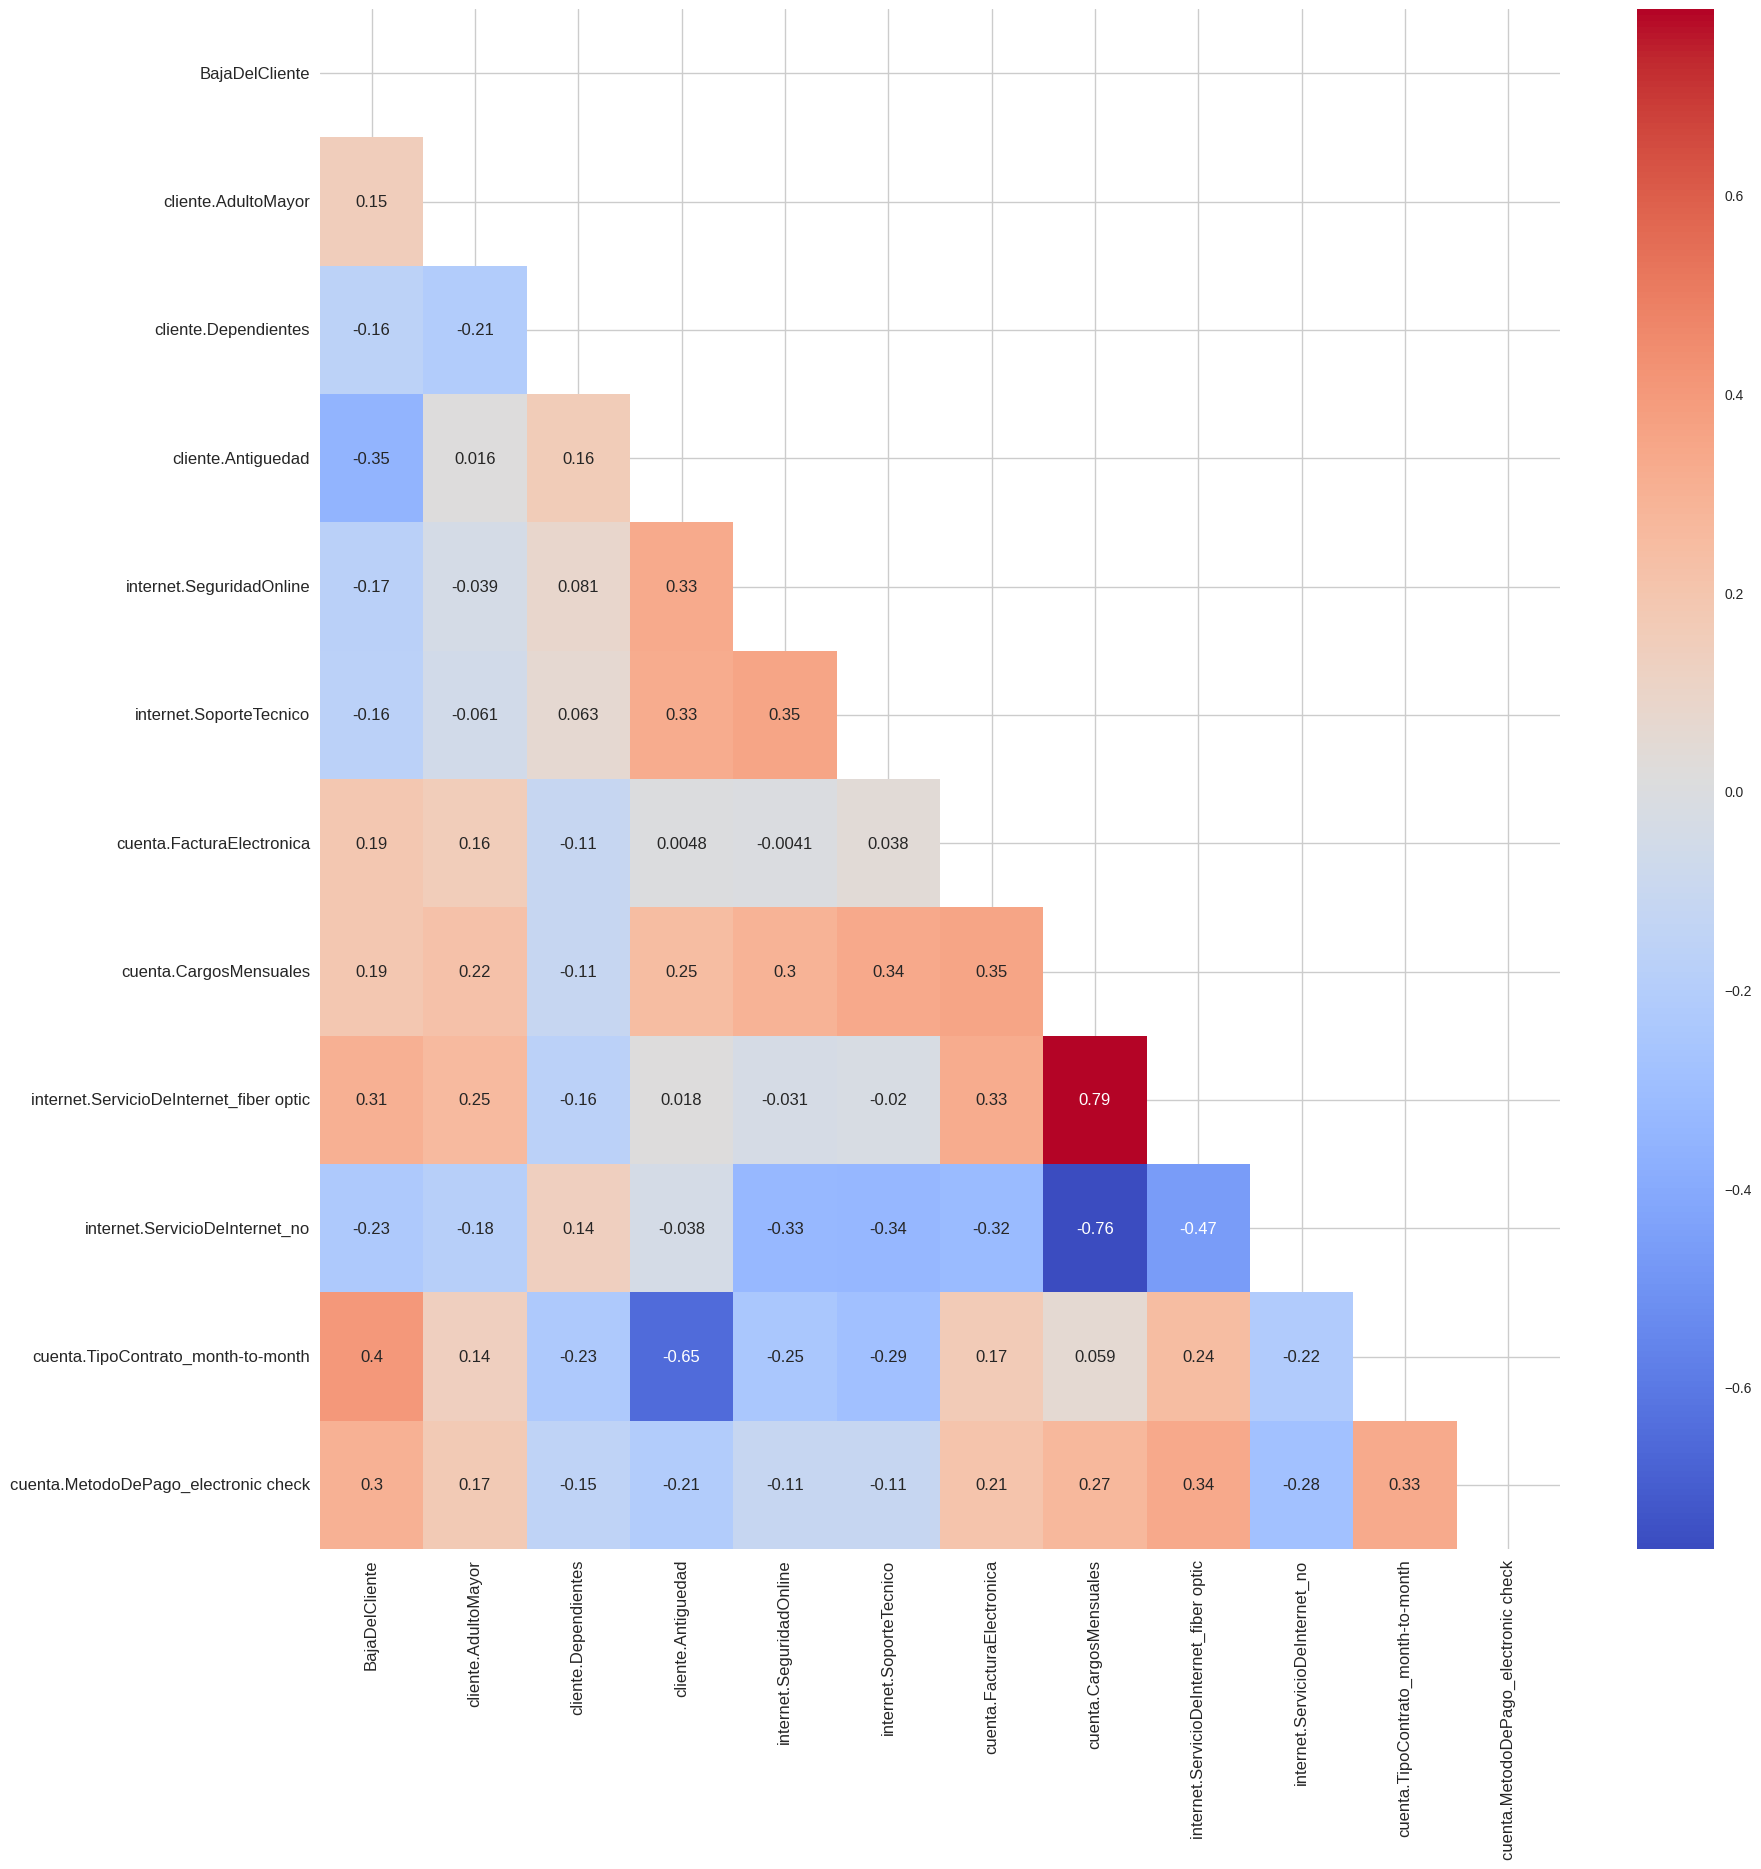

In [395]:
df_corr2 = df_encoded.corr()

# Matriz de correlacion con una mascara en la parte superior
mask = np.triu(np.ones_like(df_corr2, dtype=bool))
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_corr2, mask=mask, annot=True, cmap='coolwarm', ax=ax)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

    Se observa una alta correlacion entre CargosMensuales y las variables referidad a Servicio de Internet (fibra optica y no)
    De estas 2 ultimas variables decido quedarme solo con fibra optica, debido a que en el analisis exploratorio esta fue considerada como una variable relevante para
    explicar la baja de clientes

In [396]:
df_encoded = df_encoded.drop(columns='internet.ServicioDeInternet_no')


    En cuanto a la correlacion entre CargosMensuales y fibra optica, al parecer gran parte del monto de los cargos mensuales es explicada por el costo  del
    servicio de fibra optica. Estas 2 variables estarian muy relacionadas y de alli si alta correlacion.
    Para eligir cual de las 2 conservar en el analisis analizo su incidencia respecto a variable BajaDelCliente.

In [397]:
  # Correlacion respecto a  la variable 'BajaDelCliente'
df_corr2['BajaDelCliente'].sort_values(ascending=False)

,BajaDelCliente
BajaDelCliente,1.000000
cuenta.TipoContrato_month-to-month,0.404565
internet.ServicioDeInternet_fiber optic,0.307463
cuenta.MetodoDePago_electronic check,0.301455
cuenta.CargosMensuales,0.192858
cuenta.FacturaElectronica,0.191454
cliente.AdultoMayor,0.150541
cliente.Dependientes,-0.163128
internet.SoporteTecnico,-0.164716
internet.SeguridadOnline,-0.171270


In [398]:
# como fibra optica tiene mayor valor de correlacion respecto a la variable objetivo, elimino la variable CargosMensuales
df_encoded = df_encoded.drop(columns='cuenta.CargosMensuales')


In [399]:
# Calculo nuevamente el VIF
X_vif3 = df_encoded.drop('BajaDelCliente', axis=1)

explicativas3 = X_vif3.columns
vif_data3 = pd.DataFrame()
vif_data3["variable"] = explicativas3
vif_data3["VIF"] = [variance_inflation_factor(X_vif3[explicativas3], i) for i in range(len(explicativas3))]
vif_data3

,variable,VIF
0,cliente.AdultoMayor,1.349740
1,cliente.Dependientes,1.457038
2,cliente.Antiguedad,2.897876
3,internet.SeguridadOnline,1.699595
4,internet.SoporteTecnico,1.710529
5,cuenta.FacturaElectronica,2.744416
6,internet.ServicioDeInternet_fiber optic,2.388934
7,cuenta.TipoContrato_month-to-month,2.294634
8,cuenta.MetodoDePago_electronic check,1.852030


In [400]:
# En definitva el df encoded quedaria conformado por las sig columanas:
print(df_encoded.columns)
df_encoded.info()

Index(['BajaDelCliente', 'cliente.AdultoMayor', 'cliente.Dependientes',
       'cliente.Antiguedad', 'internet.SeguridadOnline',
       'internet.SoporteTecnico', 'cuenta.FacturaElectronica',
       'internet.ServicioDeInternet_fiber optic',
       'cuenta.TipoContrato_month-to-month',
       'cuenta.MetodoDePago_electronic check'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   BajaDelCliente                           7032 non-null   int64
 1   cliente.AdultoMayor                      7032 non-null   int64
 2   cliente.Dependientes                     7032 non-null   int64
 3   cliente.Antiguedad                       7032 non-null   int64
 4   internet.SeguridadOnline                 7032 non-null   int64
 5   internet.SoporteTecnico                  7032 non-null 

#🤖 C. Modelado Predictivo

##1.	Separación de Datos

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una división común es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tamaño de la base de datos.


In [401]:
# Realizo la separacion de los datos en entrenamiento, validacion y prueba
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='BajaDelCliente')
y = df_encoded['BajaDelCliente']

X_test, X_temp, y_test, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_train, y_val, y_train = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

###Balanceo de Clases

In [402]:
# Se realiza el Balanceo de Clases, solo sobre los datos de entrenamiento y validacion
# Como el objeto de estudio del modelado es la baja de clientes, aplico la tecnica de undersampling "NearMiss",
# para dejar intactos los valores positivos de la columna 'BajaDelCliente'

from imblearn.under_sampling import NearMiss

nm = NearMiss(version=3, n_neighbors=3)
X_train_bal, y_train_bal = nm.fit_resample(X_train, y_train)


###Normalizacion o Estandarizacion (si es necesario)

In [403]:
# Se normalizan los datos ya que aplicare el modelo KNN

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)

X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,cliente.AdultoMayor,cliente.Dependientes,cliente.Antiguedad,internet.SeguridadOnline,internet.SoporteTecnico,cuenta.FacturaElectronica,internet.ServicioDeInternet_fiber optic,cuenta.TipoContrato_month-to-month,cuenta.MetodoDePago_electronic check
0,0.0,1.0,1.000000,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.523077,0.0,0.0,1.0,0.0,1.0,1.0
2,0.0,0.0,0.984615,0.0,0.0,1.0,1.0,0.0,1.0
3,1.0,0.0,0.523077,1.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.984615,0.0,0.0,1.0,1.0,1.0,1.0


##2.	Creación de Modelos

Crea al menos dos modelos diferentes para predecir la cancelación de clientes.

•	Un modelo puede requerir normalización, como Regresión Logística o KNN.

•	El otro modelo puede no requerir normalización, como Árbol de Decisión o Random Forest.

💡 La decisión de aplicar o no la normalización depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalización, pero también es una opción combinar modelos con y sin normalización.

Justificación:

  •	Regresión Logística / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalización es importante para que los coeficientes o las distancias se calculen correctamente.

  •	Árbol de Decisión / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalización.

Si decides normalizar los datos, deberías explicar cómo esta etapa asegura que los modelos basados en distancia o en optimización de parámetros no se vean sesgados por la magnitud de las variables.


In [404]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train_bal)
y_pred_rf = rf_model.predict(X_test_scaled)       #rf_pred

# Modelo KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train_bal)
y_pred_knn = knn_model.predict(X_test_scaled)     #knn_pred


##3.	Evaluación de los Modelos

Evalúa cada modelo utilizando las siguientes métricas:

•	Exactitud (Acurácia)

•	Precisión

•	Recall

•	F1-score

•	Matriz de confusión

Después, realiza un análisis crítico y compara los modelos:

•	¿Cuál modelo tuvo el mejor desempeño?

•	¿Algún modelo presentó overfitting o underfitting?

Si es así, considera las posibles causas y ajustes:

o	Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

o	Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus parámetros.


In [405]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

# Función para evaluar modelos

def evaluar_modelo(nombre, y_test, y_pred):
    print(f"----- {nombre} -----")
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Exactitud:  {acc:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    # Mostrar matriz de confusión
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")
    plt.title(f"Matriz de Confusión - {nombre}")
    plt.xlabel("Predicted")
    plt.ylabel("Real")
    plt.show()

    return {"modelo": nombre, "exactitud": acc, "recall": recall, "precision": precision, "f1": f1}


----- Random Forest -----
Exactitud:  0.7330
Recall:    0.5232
Precision: 0.4996
F1-Score:  0.5112


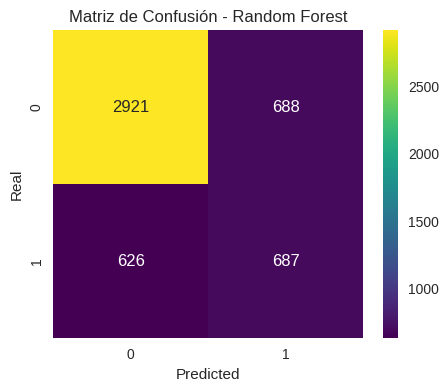

----- KNN -----
Exactitud:  0.6969
Recall:    0.5765
Precision: 0.4471
F1-Score:  0.5037


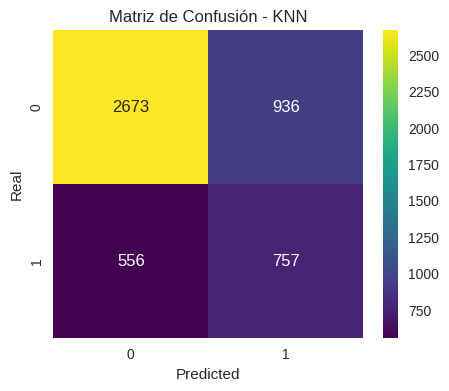

In [406]:
# Evaluo ambos modelos
rf_metricas = (evaluar_modelo("Random Forest", y_test, y_pred_rf))
knn_metricas = (evaluar_modelo("KNN", y_test, y_pred_knn))


### 3.A. Overfitting o Underfitting

#### Random Forest

In [407]:
# Para saber si existe overfitting o underfitting en alguno de los modelos:

from sklearn.metrics import classification_report

#RandomForest
# Predicciones en entrenamiento
y_train_pred_rf = rf_model.predict(X_train_scaled)
print("Random Forest - Entrenamiento:")
print(classification_report(y_train_bal, y_train_pred_rf))

# Predicciones en test
print("Random Forest - Test:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Entrenamiento:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.99      0.99      0.99       105

    accuracy                           0.99       210
   macro avg       0.99      0.99      0.99       210
weighted avg       0.99      0.99      0.99       210

Random Forest - Test:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3609
           1       0.50      0.52      0.51      1313

    accuracy                           0.73      4922
   macro avg       0.66      0.67      0.66      4922
weighted avg       0.74      0.73      0.73      4922



    El modelo Random Forest presenta overfitting: excelente rendimiento en entrenamiento pero mal
    rendimiento en prueba, sobre todo al predecir verdaderos negativos


    Random Forest tiene varios hiperparámetros que puedo ajustar para reducir el sobreajuste. Lo
    ideal seria hacer un Grid Search para encontrar los mejores hiperparámetros con validación cruzada.

In [408]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train_bal)

print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

Mejores parámetros encontrados:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [409]:
rf_model2 = RandomForestClassifier(random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100)
rf_model2.fit(X_train_scaled, y_train_bal)
y_pred2_rf= rf_model2.predict(X_test_scaled)


----- Random Forest 2 -----
Exactitud:  0.7371
Recall:    0.5034
Precision: 0.5073
F1-Score:  0.5054


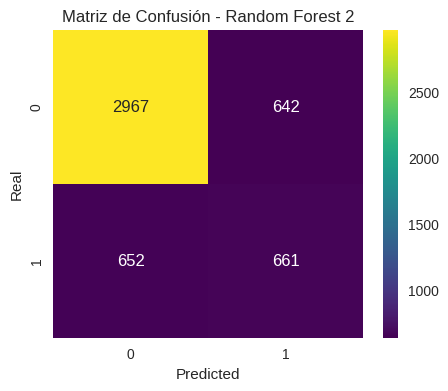

In [410]:
rf_metricas2 = (evaluar_modelo("Random Forest 2", y_test, y_pred2_rf))

In [411]:
# Predicciones en entrenamiento
y_train_pred2_rf = rf_model2.predict(X_train_scaled)
print("Random Forest 2 - Entrenamiento:")
print(classification_report(y_train_bal, y_train_pred2_rf))

# Predicciones en test
print("Random Forest 2 - Test:")
print(classification_report(y_test, y_pred2_rf))

print('--------------------------------------')

print("Random Forest - Entrenamiento:")
print(classification_report(y_train_bal, y_train_pred_rf))

print("Random Forest - Test:")
print(classification_report(y_test, y_pred_rf))

Random Forest 2 - Entrenamiento:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.99      0.97      0.98       105

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210

Random Forest 2 - Test:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      3609
           1       0.51      0.50      0.51      1313

    accuracy                           0.74      4922
   macro avg       0.66      0.66      0.66      4922
weighted avg       0.74      0.74      0.74      4922

--------------------------------------
Random Forest - Entrenamiento:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.99      0.99      0.99       105

    accuracy                           0.99       210
 

    No se nota una mejoria significativa a traves del ajuste de los hiperparametros en el modelo Random Forest

#### KNN

In [412]:
# Predicciones en entrenamiento
y_train_pred_knn = knn_model.predict(X_train_scaled)
print("KNN - Entrenamiento:")
print(classification_report(y_train_bal, y_train_pred_knn))

# Predicciones en test
print("KNN - Test:")
print(classification_report(y_test, y_pred_knn))

KNN - Entrenamiento:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       105
           1       0.71      0.71      0.71       105

    accuracy                           0.71       210
   macro avg       0.71      0.71      0.71       210
weighted avg       0.71      0.71      0.71       210

KNN - Test:
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      3609
           1       0.45      0.58      0.50      1313

    accuracy                           0.70      4922
   macro avg       0.64      0.66      0.64      4922
weighted avg       0.73      0.70      0.71      4922



    El modelo KNN presenta un rendimiento irregular ya que detecta muy bien los verdaderos positivos pero
    tiene un marcado overfitting al detectar verdaderos negativos, donde su performance es bastante mala.

    Para reducir ese overfitting en el  modelo KNN se puede usar la validación cruzada para encontrar el mejor k.

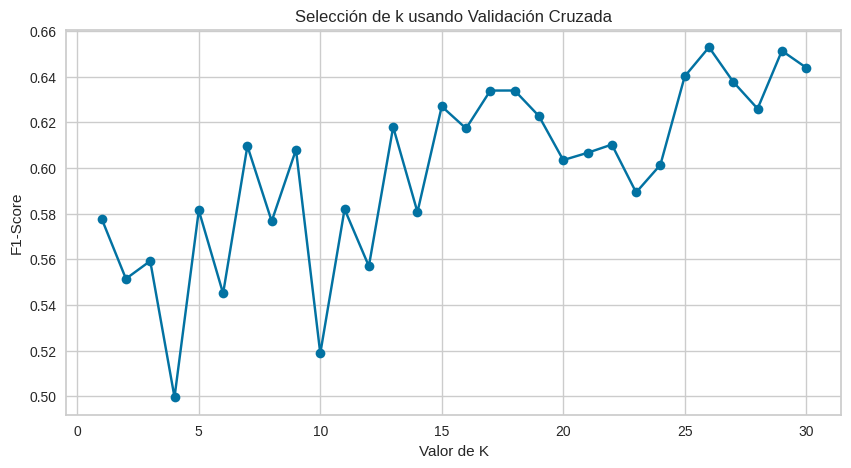

In [413]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train_bal, cv=5, scoring='f1')
    scores.append(score.mean())

# Graficar resultados
plt.figure(figsize=(10,5))
plt.plot(k_range, scores, marker='o')
plt.xlabel('Valor de K')
plt.ylabel('F1-Score')
plt.title('Selección de k usando Validación Cruzada')
plt.grid(True)
plt.show()

In [414]:
knn_model2 = KNeighborsClassifier(n_neighbors=26)
knn_model2.fit(X_train_scaled, y_train_bal)
y_pred2_knn = knn_model2.predict(X_test_scaled)

----- KNN2 -----
Exactitud:  0.7529
Recall:    0.6794
Precision: 0.5287
F1-Score:  0.5947


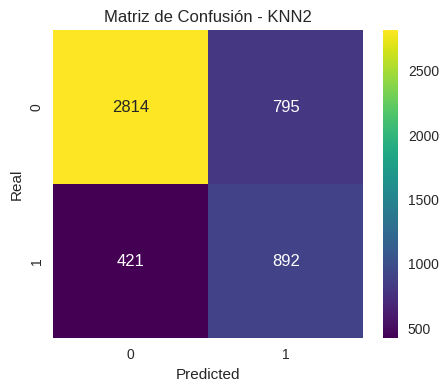

In [415]:
knn_metricas2 = (evaluar_modelo("KNN2", y_test, y_pred2_knn))

In [416]:
# Predicciones en entrenamiento
y_train_pred2_knn = knn_model2.predict(X_train_scaled)
print("KNN2 - Entrenamiento:")
print(classification_report(y_train_bal, y_train_pred2_knn))

# Predicciones en test
print("KNN2 - Test:")
print(classification_report(y_test, y_pred2_knn))

print('--------------------------------------')

print("KNN - Entrenamiento:")
print(classification_report(y_train_bal, y_train_pred_knn))

print("KNN - Test:")
print(classification_report(y_test, y_pred_knn))

KNN2 - Entrenamiento:
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       105
           1       0.62      0.66      0.64       105

    accuracy                           0.62       210
   macro avg       0.62      0.62      0.62       210
weighted avg       0.62      0.62      0.62       210

KNN2 - Test:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      3609
           1       0.53      0.68      0.59      1313

    accuracy                           0.75      4922
   macro avg       0.70      0.73      0.71      4922
weighted avg       0.78      0.75      0.76      4922

--------------------------------------
KNN - Entrenamiento:
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       105
           1       0.71      0.71      0.71       105

    accuracy                           0.71       210
   macro avg       0.71      0.71

### 3.B Eleccion del mejor modelo

In [417]:
# Comparo y elijo el mejor modelo

def comparacion_modelos(m1, m2):
    print("### Comparación de Modelos ###\n")
    for metrica in ["exactitud", "recall", "precision", "f1"]:
        print(f"{metrica.capitalize()}:")
        print(f"  {m1['modelo']}: {m1[metrica]:.4f}")
        print(f"  {m2['modelo']}: {m2[metrica]:.4f}\n")

comparacion_modelos(rf_metricas2, knn_metricas2)

### Comparación de Modelos ###

Exactitud:
  Random Forest 2: 0.7371
  KNN2: 0.7529

Recall:
  Random Forest 2: 0.5034
  KNN2: 0.6794

Precision:
  Random Forest 2: 0.5073
  KNN2: 0.5287

F1:
  Random Forest 2: 0.5054
  KNN2: 0.5947



    Si el objetivo de la empresa es minimizar la cantidad de bajas de clientes sin importar el “costo” de una predicción errónea ( esdecir el
    objetivo es detectar los clientes que se quieren ir, los falsos positivos) la metrica adecuada para evaluar los modelos deberia ser Recall (Sensibilidad).
    Si tambien es importante evitar falsos positivos ( gastar  esfuerzos en clientes que no
    si iban a ir), se deberian evaluar los modelos con la metrica F1.
    En cualquiera de los casos, despues de los ajustes hiperparametricos, el modelo KNN  es el elegido debido a que su Recall  y su F1 es claramente superior.
    Aun asi el nivel de rendimiento del modelo champion es discreto.


#📋 D. Interpretación y Conclusiones

##1.	Análisis de la Importancia de las Variables

Después de elegir los modelos, realiza el análisis de las variables más relevantes para la predicción de la cancelación:

•	Regresión Logística: Investiga los coeficientes de las variables, que muestran su contribución a la predicción de cancelación.

•	KNN (K-Nearest Neighbors): Observa cómo los vecinos más cercanos influyen en la decisión de clasificación. Las variables más impactantes pueden ser aquellas que más contribuyen a la proximidad entre los puntos de datos.

•	Random Forest: Utiliza la importancia de las variables proporcionada por el modelo. Random Forest calcula la importancia basándose en cómo cada variable contribuye a la reducción de la impureza durante las divisiones de los árboles.

•	SVM (Support Vector Machine): En el SVM, las variables más relevantes son aquellas que influyen en la frontera de decisión entre las clases. Puedes analizar los coeficientes de los vectores de soporte para entender qué variables tienen mayor impacto.

•	Otros Modelos: Dependiendo del modelo elegido, considera el análisis de métricas específicas para comprender la relevancia de las variables. Por ejemplo, coeficientes en modelos lineales, pesos en redes neuronales, o la importancia relativa en técnicas de boosting (como XGBoost).


In [418]:
# Importancia de las variables en el modelo kNN
from sklearn.feature_selection import SelectKBest, f_classif

feature_names = X.columns

# Asumiendo que tienes X_train_scaled en formato NumPy y nombres de variables en 'feature_names'
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train_bal)

# Mostrar puntajes
feature_scores = pd.DataFrame({
    'Feature': feature_names,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

feature_scores



,Feature,Score
2,cliente.Antiguedad,23.218650
7,cuenta.TipoContrato_month-to-month,14.761290
3,internet.SeguridadOnline,4.007643
6,internet.ServicioDeInternet_fiber optic,3.894536
1,cliente.Dependientes,2.709745
0,cliente.AdultoMayor,2.222691
4,internet.SoporteTecnico,0.894085
8,cuenta.MetodoDePago_electronic check,0.472727
5,cuenta.FacturaElectronica,0.020313


In [419]:
# Importancia de las variables en el modelo Random Forest

from yellowbrick.model_selection import FeatureImportances

importances_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model2.feature_importances_
}).sort_values(by='Importance', ascending=False)

importances_rf

,Feature,Importance
2,cliente.Antiguedad,0.570578
5,cuenta.FacturaElectronica,0.069607
1,cliente.Dependientes,0.064523
6,internet.ServicioDeInternet_fiber optic,0.062897
8,cuenta.MetodoDePago_electronic check,0.050007
7,cuenta.TipoContrato_month-to-month,0.049620
0,cliente.AdultoMayor,0.046641
3,internet.SeguridadOnline,0.044648
4,internet.SoporteTecnico,0.041479


    Del analisis de Importancia de las variables podemos concluir que la más importante es
    Antiguedad en ambos modelos, seguida por tipo de contrato Mes a mes, fibra optica y Seguridad Online.

## 2.	Conclusión

(Elaboren un informe detallado, destacando los factores que más influyen en la cancelación, basándose en las variables seleccionadas y en el rendimiento de cada modelo.
Identifiquen los principales factores que afectan la cancelación de clientes y propongan estrategias de retención basadas en los resultados obtenidos.)



El objetivo de este trabajo fue obtener un modelo predictivo confiable que sea capaz de predecir si un cliente dejará o no la empresa Telecom.

Se analizó 2 posibles modelos predictivos:
*   Random Forest
*   KNN

Se aplicó Tecnicas de balanceo undersamplig, normalizacion y la Tecnica VIF, con el fin de obtener métricas adecuadas y confiables para comparar ambos modelos, resultando el modelo KNN como el ganador, siendo éste nuestro modelo champion.


Habiendo aplicado diferentes técnicas para identificar las variables mas relevantes para la prediccion de la Baja de Clientes, se concluye que las variables que más inciden en la Evasión son:

* Antiguedad (o Duracion del Contrato): Mientras mas tiempo  permanece el cliente en la compañía, menor es el riesgo de que renuncien. Asi mismo, cuanto mas nuevos son los clientes, mayor es la probabilidad de que dejen la compania.
* Tipo de Contrato Mes a Mes: Los clientes con este tipo de contrato tienen mayor probalidad de abandonar la compañía.
* Servicio de Internet por Fibra Optica: Los clientes con este tipo de servicio tienden a darse de baja con mayor frecuencia.
* Otros factores como la contratacion de Seguridad Online o utiizar el cheque electronico como medio de pago tambien afectan a la cantidad de abondonos, pero en menor medida.

Estrategias para la retención de clientes:
1. Incentivar a los clientes a suscribir contratos a mas largo plazo, atraves de promociones y descuentos, para lograr la fidelización de la clientela.
2. Mejorar la experiencia de los clientes que contratan internet por fibra optica, ya que al parecer el valor percibido no se corresponde con el precio pagado por ese servicio. Se debería analizar si es una cuestión de precios altos, o una deficiente prestación de ese servicio.
3. Ofrecer a los clientes nuevos algunos beneficios al inicio de la relacion comercial, como la inclusión de la Seguridad Online o el Soporte Tecnico de forma bonificada, para asi lograr atraer mas clientela y lograr su fidelización.
